# Factoring semi-primes with the resonator network

In [1]:
from pylab import *
import math

import res_utils as ru

In [2]:
%matplotlib inline

plt.rcParams.update({'font.size': 18})
plt.rcParams.update({'font.family': 'serif', 
                     'font.serif':['Computer Modern']})

In [3]:
# return a dict or a list of primes up to N
# create full prime sieve for N=10^6 in 1 sec
def prime_sieve(n, output={}):
    nroot = int(math.sqrt(n))
    sieve = np.arange(n+1)
    sieve[1] = 0

    for i in range(2, nroot+1):
        if sieve[i] != 0:
            m = int(n/i - i)
            sieve[i*i: n+1:i] = [0] * (m+1)

    if type(output) == dict:
        pmap = {}
        for x in sieve:
            if x != 0:
                pmap[x] = True
        return pmap
    elif type(output) == list:
        return [x for x in sieve if x != 0]
    else:
        return None

In [4]:
prime_range = int(1e4)
list_of_primes = prime_sieve(prime_range, [])

/var/folders/xn/hqbqng2d6nz8f1lcyd545kqr0000gn/T/ipykernel_13105/543448723.py:3: RuntimeWarning: divide by zero encountered in log
  plot(prime_approx_x/(np.log(prime_approx_x)-1), prime_approx_x, ":k")


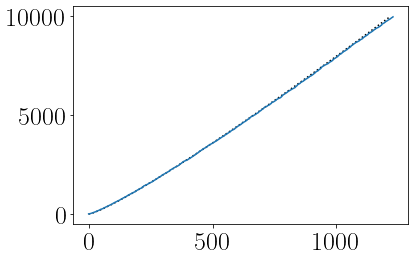

In [5]:
prime_approx_x = np.linspace(0, prime_range, 500)

plot(prime_approx_x/(np.log(prime_approx_x)-1), prime_approx_x, ":k")

plot(list_of_primes)

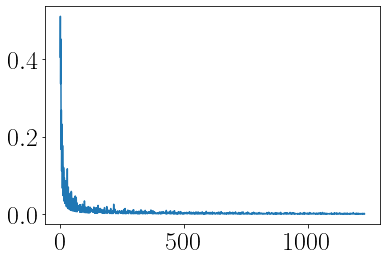

In [6]:
log_diff = np.diff(np.log(list_of_primes))    
    
plot(log_diff)  

In [7]:
beta = 1e4/min(log_diff)
print(beta)

49649999.832372874


In [8]:
N = 10000
D = len(list_of_primes)

z_phi = ru.cvec(N, 1)

phi = ru.cvec(N, D)

for i in range(D):
    phi[i] = z_phi ** (beta * np.log(list_of_primes[i]))

In [9]:
list_of_primes[0], list_of_primes[2]

(2, 5)

In [10]:
z10 = z_phi ** (beta * np.log(10))

z2x5 = phi[0] * phi[2]

print(np.real(np.dot(z10, np.conj(z2x5))/N))


1.0000000003400662


In [11]:
res_vecs = [phi, phi]

In [12]:
pidx1 = np.random.randint(len(list_of_primes))
pidx2 = np.random.randint(len(list_of_primes))

# make smaller number index 1
if pidx1 > pidx2:
    pidx1, pidx2 = pidx2, pidx1

p1 = list_of_primes[pidx1]
p2 = list_of_primes[pidx2]

s = p1 * p2

print(p1, p2, s)


6113 9631 58874303


In [13]:
bound_vec = z_phi ** (beta * np.log(s))

In [14]:
tst = time.time()
res_hist, nsteps = ru.res_decode_abs_slow(bound_vec, res_vecs, 200)
print('Elapsed:', time.time() - tst)

converged: 26
Elapsed: 3.2865653038024902


[796, 1189]


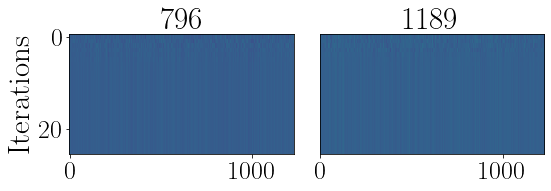

In [15]:
# visualize the convergence dynamics
figure(figsize=(8,3))

ru.resplot_im(res_hist, nsteps)

plt.tight_layout()

In [16]:
#res_hist2 = [res_hist[0][:, 100*(p1//100):(100*(p1//100)+100)], res_hist[1][:, 100*(p2//100):(100*(p2//100)+100)]]
p1st = 100*(pidx1//100)
p2st = 100*(pidx2//100)

res_hist2 = [res_hist[0][:, p1st:(p1st+100)], res_hist[1][:, p2st:(p2st+100)]]
print(p1st, p2st)

700 1100


[96, 89]


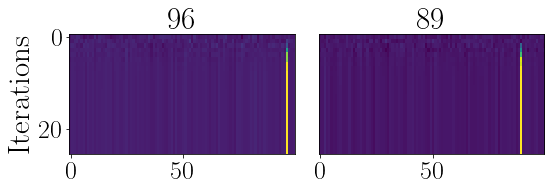

In [17]:
# visualize the convergence dynamics
figure(figsize=(8,3))

ru.resplot_im(res_hist2, nsteps)

plt.tight_layout()

In [18]:
out_w, out_c = ru.get_output_conv(res_hist, nsteps)
print(out_w, out_c)

[796, 1189] 1


In [19]:
print(list_of_primes[out_w[0]], list_of_primes[out_w[1]])
print(p1, p2)

6113 9631
6113 9631


### limiting number of factors



In [20]:
sqrt_cutoff = np.where(list_of_primes <= np.sqrt(s))[0][-1]
shalf_cutoff = np.where(list_of_primes <= s/2)[0][-1]

phi_low = phi[:sqrt_cutoff+1]
phi_high= phi[sqrt_cutoff:shalf_cutoff]

print(sqrt_cutoff, shalf_cutoff)

971 1228


In [21]:
phi_low.shape, phi_high.shape

((972, 10000), (257, 10000))

In [22]:
res_vecs2 = [phi_low, phi_high]

In [23]:
tst = time.time()
res_hist, nsteps = ru.res_decode_abs_slow(bound_vec, res_vecs2, 200)
print('Elapsed:', time.time() - tst)

converged: 12
Elapsed: 0.790489912033081


[796, 218]


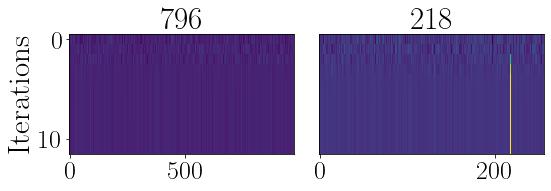

In [24]:
# visualize the convergence dynamics
figure(figsize=(8,3))

ru.resplot_im(res_hist, nsteps)

plt.tight_layout()

In [25]:
#res_hist2 = [res_hist[0][:, 100*(p1//100):(100*(p1//100)+100)], res_hist[1][:, 100*(p2//100):(100*(p2//100)+100)]]
p1st = 100*(pidx1//100)
p2st = 100*((pidx2-sqrt_cutoff)//100)

res_hist2 = [res_hist[0][:, p1st:(p1st+100)], res_hist[1][:, p2st:(p2st+100)]]
print(p1st, p2st)

700 200


[96, 18]


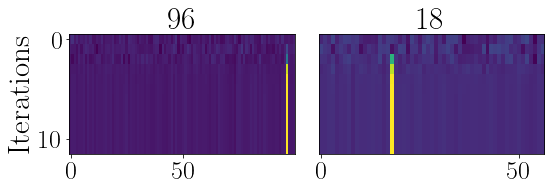

In [26]:
# visualize the convergence dynamics
figure(figsize=(8,3))

ru.resplot_im(res_hist2, nsteps)

plt.tight_layout()

In [27]:
out_w, out_c = ru.get_output_conv(res_hist, nsteps)
print(out_w, out_c)

[796, 218] 1


In [28]:
out_w[1] += sqrt_cutoff

In [29]:
print(list_of_primes[out_w[0]], list_of_primes[out_w[1]])
print(p1, p2)

6113 9631
6113 9631
